# X Education - Lead Scoring Case Study

## Step 1: Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import precision_recall_curve

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
df = pd.read_csv("D:\Data Science and Analytics\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Visualizing and Cleaning the Data

In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
(df.isnull().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
df['Lead Quality'].value_counts(dropna = False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

- Expecting Lead Quality as an important feature. So, I am not droping this feature.

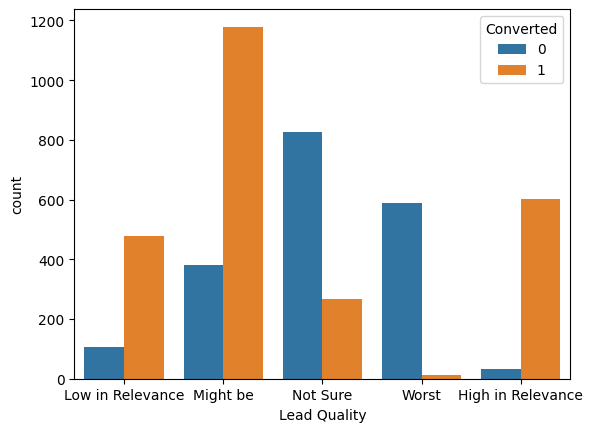

In [9]:
sns.countplot(data = df, x = 'Lead Quality', hue = 'Converted')
plt.show()

In [10]:
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

In [11]:
df['Lead Quality'].value_counts(dropna = False)

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [12]:
df['Lead Quality'] = df['Lead Quality'].replace(['Low in Relevance', 'Might be', 'Not Sure'], 'Not Sure')

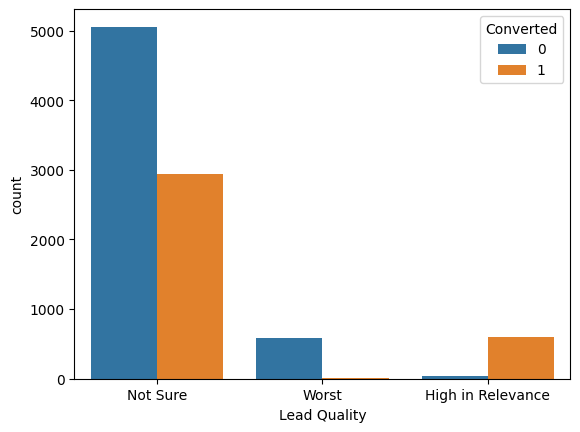

In [13]:
sns.countplot(data = df, x = 'Lead Quality', hue = 'Converted')
plt.show()

In [14]:
df['Asymmetrique Activity Index'].value_counts(dropna = False)

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

- Expecting Asymetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score features of no use.

In [15]:
df.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1, inplace = True)

In [16]:
(df.isnull().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [18]:
df['Tags'] = df['Tags'].replace(np.nan, 'Not mentioned')

In [19]:
df['Tags'].value_counts(dropna = False)

Not mentioned                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

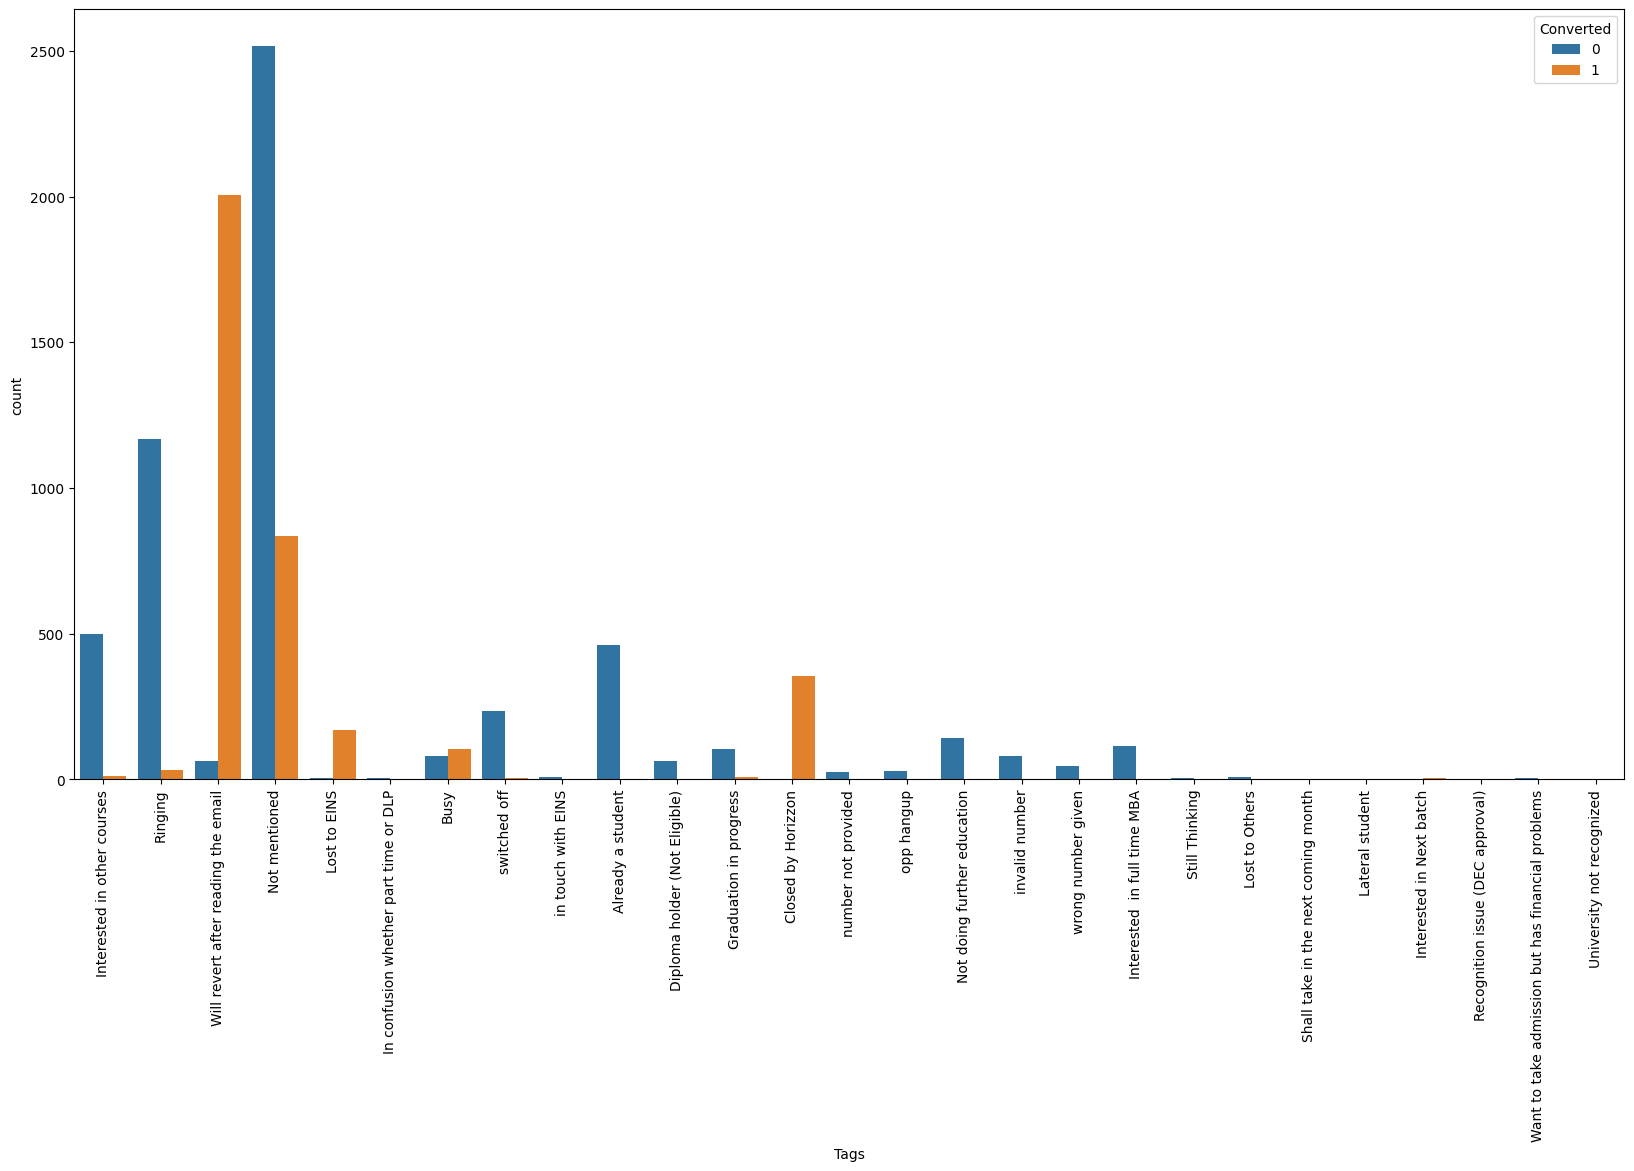

In [20]:
plt.figure(figsize = [20,10])
sns.countplot(data = df, x = 'Tags', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [21]:
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS', 'number not provided', 'opp hangup', 'Still Thinking', 'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch', 'Recognition issue (DEC approval)','Want to take admission but has financial problems', 'University not recognized'], 'Other tags')

In [22]:
df['Tags'] = df['Tags'].replace(['switched off', 'Already a student', 'Diploma holder (Not Eligible)', 'Graduation in progress', 'Not doing further education', 'invalid number', 'wrong number given', 'Interested  in full time MBA'], 'Not Intrested')

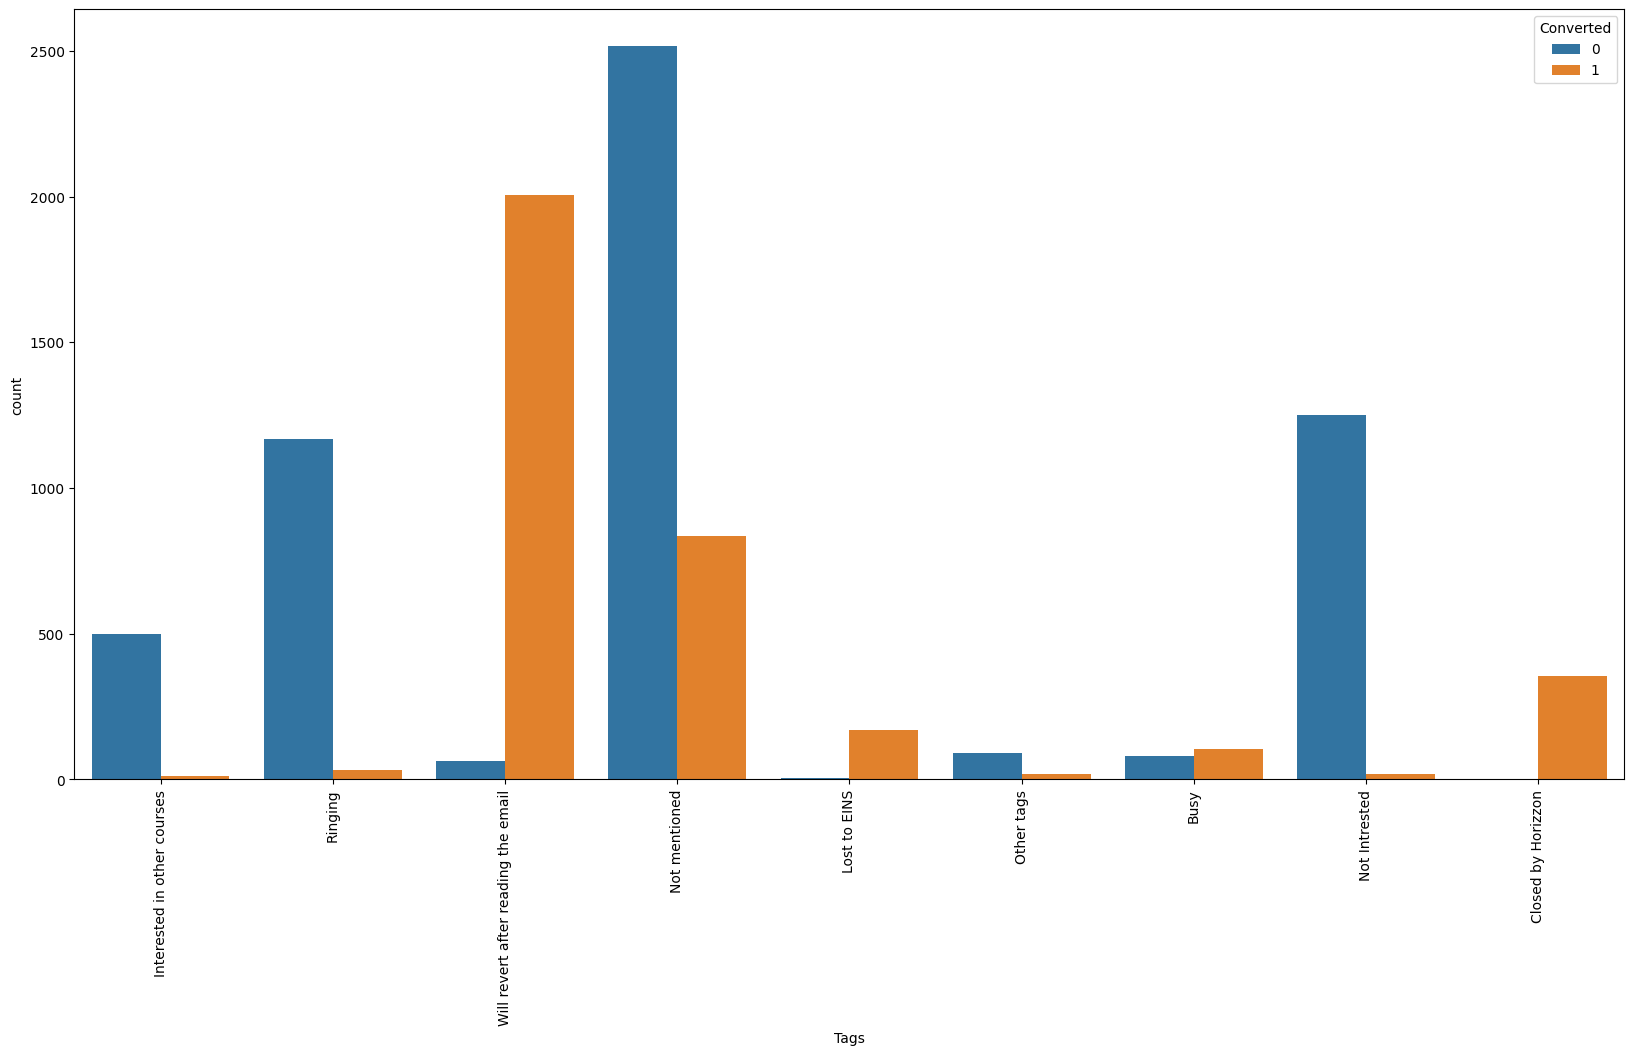

In [23]:
plt.figure(figsize = [20,10])
sns.countplot(data = df, x = 'Tags', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [24]:
df['Lead Profile'].value_counts(dropna = False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

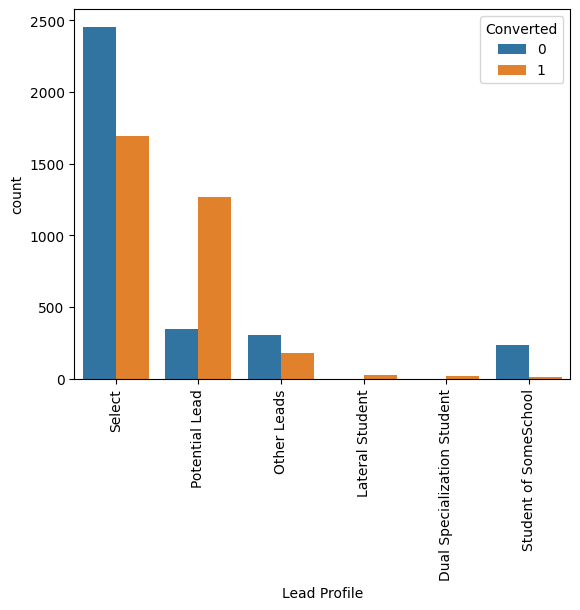

In [25]:
sns.countplot(data = df, x = 'Lead Profile', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [26]:
df['Lead Profile'] = df['Lead Profile'].replace([np.nan, 'Lateral Student', 'Dual Specialization Student', 'Student of SomeSchool', 'Select'], 'Other Leads')

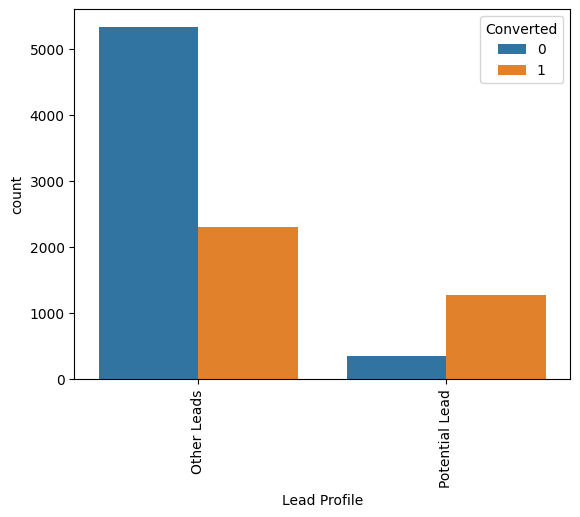

In [27]:
sns.countplot(data = df, x = 'Lead Profile', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [28]:
df.drop('Country', axis = 1, inplace = True)

In [29]:
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

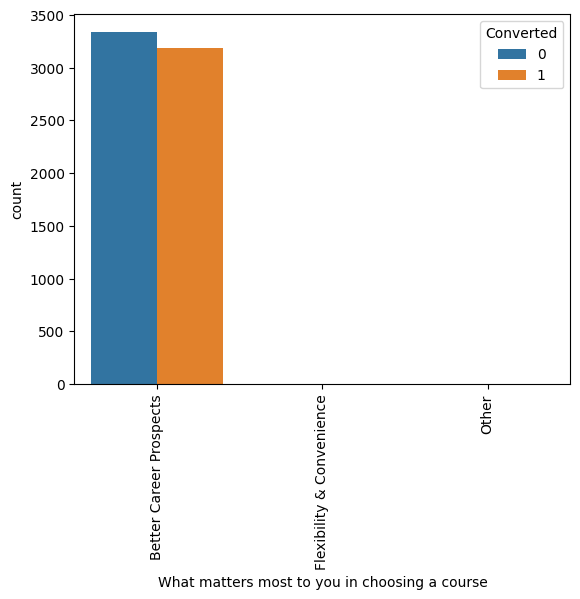

In [30]:
sns.countplot(data = df, x = 'What matters most to you in choosing a course', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [31]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [32]:
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

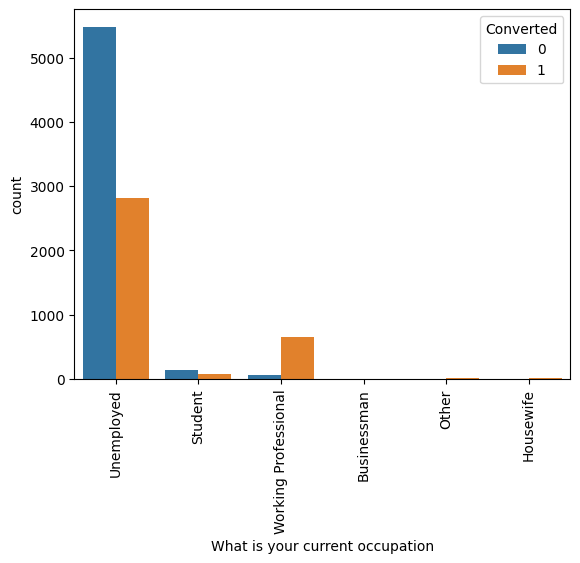

In [34]:
sns.countplot(data = df, x = 'What is your current occupation', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [35]:
df['How did you hear about X Education'].value_counts(dropna = False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [36]:
df.drop('How did you hear about X Education', axis = 1, inplace = True)

In [37]:
df['Specialization'].value_counts(dropna = False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [38]:
df['Specialization'] = df['Specialization'].replace([np.nan, 'Select'], 'Not mentioned')

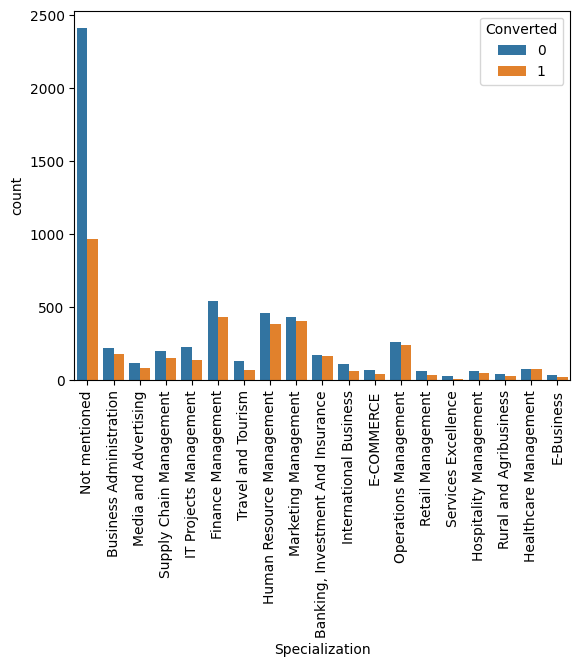

In [39]:
sns.countplot(data = df, x = 'Specialization', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [40]:
df['City'].value_counts(dropna = False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [41]:
df['City'] = df['City'].replace([np.nan, 'Select'], 'Mumbai')

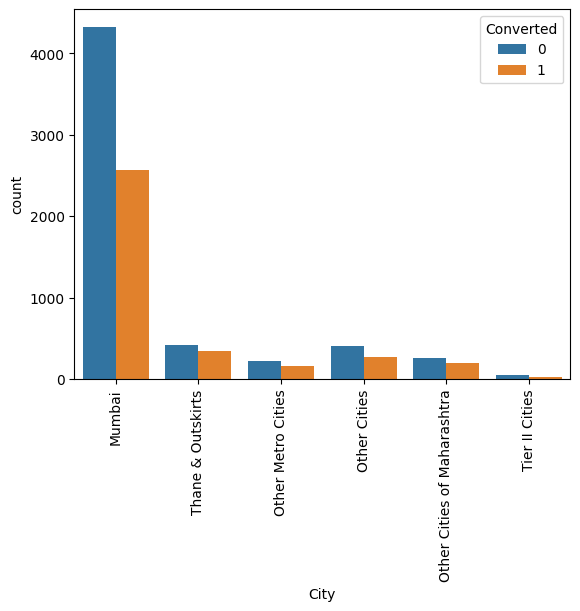

In [42]:
sns.countplot(data = df, x = 'City', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [43]:
df['TotalVisits'].median()

3.0

In [44]:
df['TotalVisits'] = df['TotalVisits'].replace(np.nan, 3)

In [45]:
df['Page Views Per Visit'].median()

2.0

In [46]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, 2)

In [47]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [48]:
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

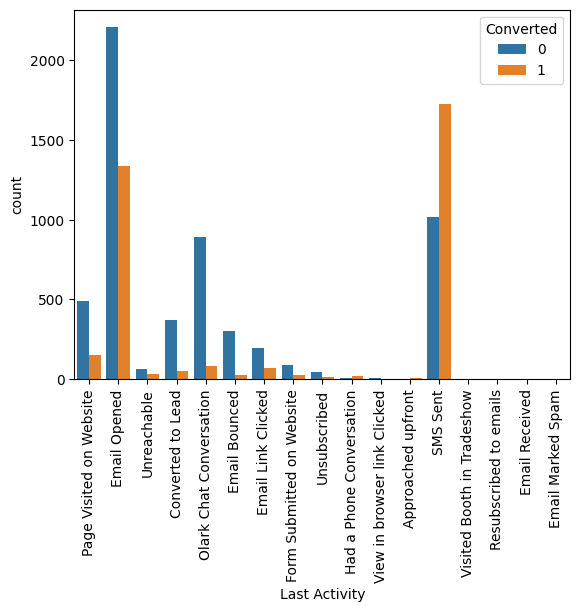

In [49]:
sns.countplot(data = df, x = 'Last Activity', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [50]:
df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [51]:
df['Lead Source'] = df['Lead Source'].replace([np.nan, 'google'], 'Google')

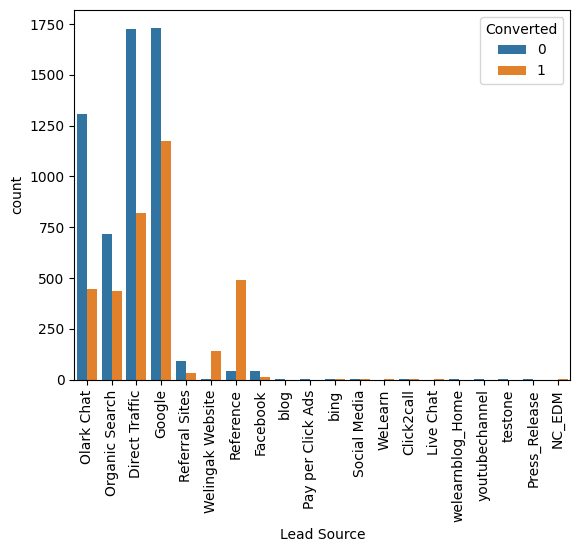

In [52]:
sns.countplot(data = df, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [54]:
df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

# Step3: Data Preparation

## Numerical Variables

In [55]:
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

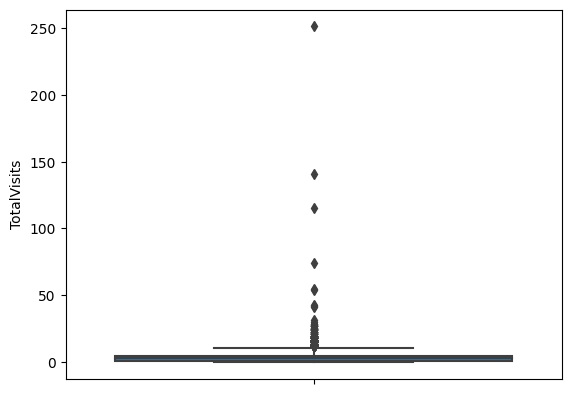

In [56]:
sns.boxplot(data = df, y = 'TotalVisits')
plt.show()

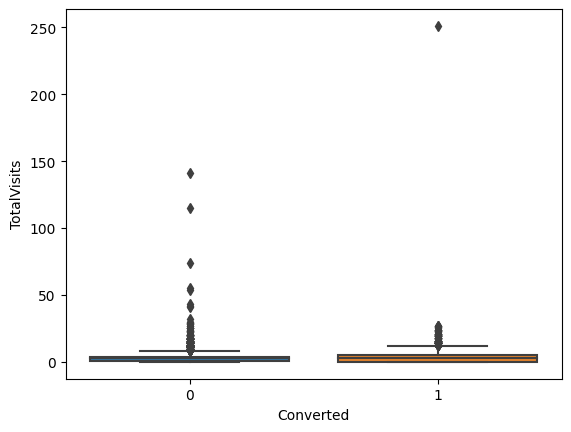

In [57]:
sns.boxplot(data = df, y = 'TotalVisits', x = 'Converted')
plt.show()

### Treating outliers

In [58]:
df['TotalVisits'].quantile([0.01,0.99])

0.01     0.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [59]:
df = df[df['TotalVisits'] <= 17]

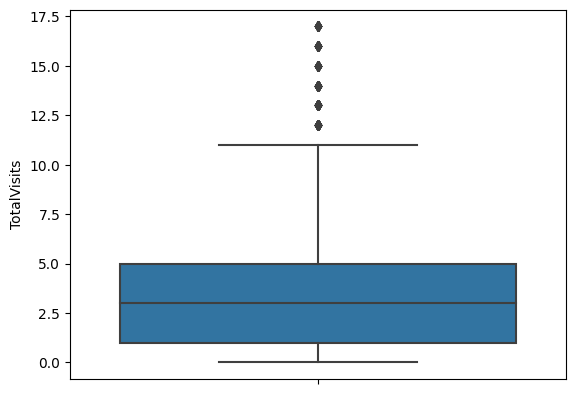

In [60]:
sns.boxplot(data = df, y = 'TotalVisits')
plt.show()

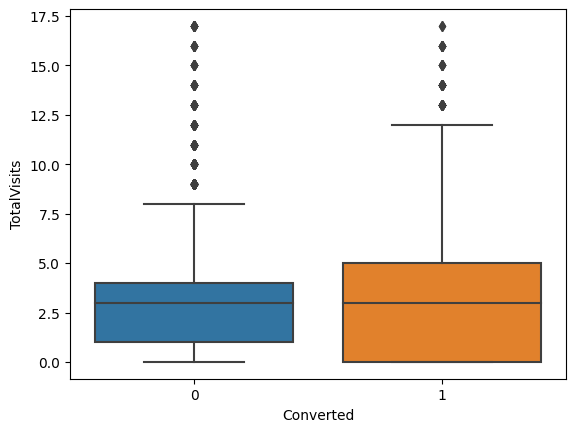

In [61]:
sns.boxplot(data = df, y = 'TotalVisits', x = 'Converted')
plt.show()

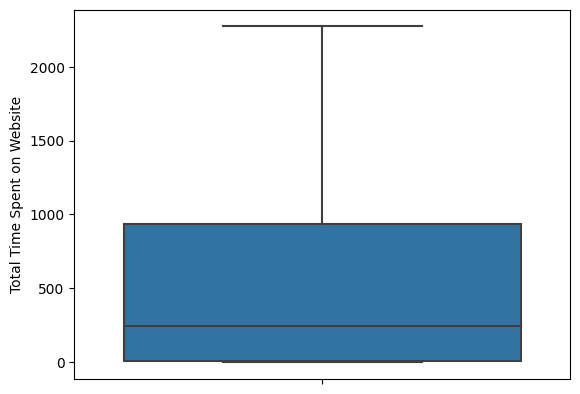

In [62]:
sns.boxplot(data = df, y = 'Total Time Spent on Website')
plt.show()

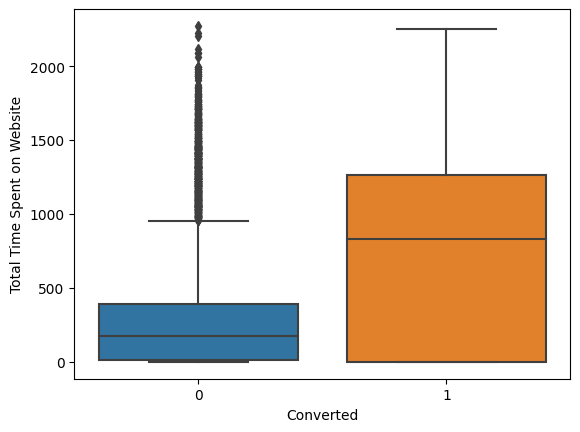

In [63]:
sns.boxplot(data = df, y = 'Total Time Spent on Website', x = 'Converted')
plt.show()

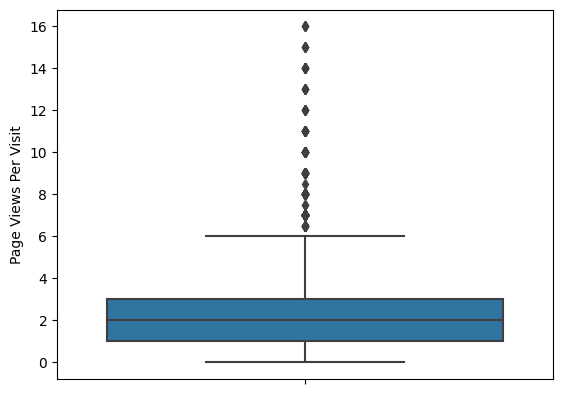

In [64]:
sns.boxplot(data = df, y = 'Page Views Per Visit')
plt.show()

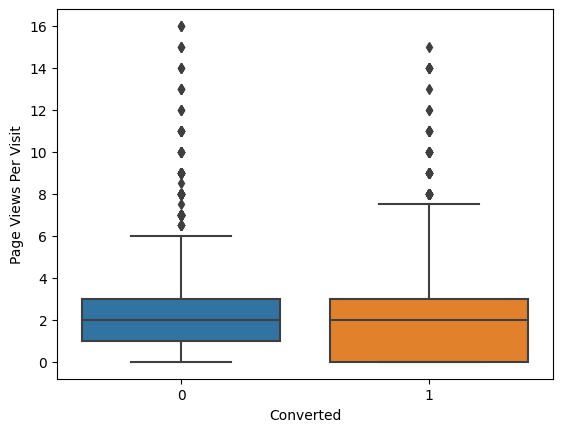

In [65]:
sns.boxplot(data = df, y = 'Page Views Per Visit', x = 'Converted')
plt.show()

In [66]:
df['Page Views Per Visit'].quantile([0.99])

0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [67]:
(df['Converted'].sum()/len(df))*100

38.49514032980233

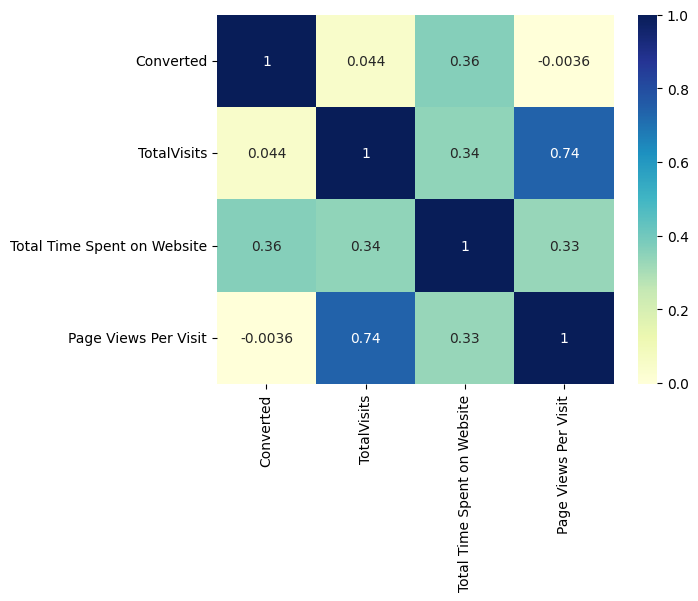

In [68]:
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

## Categorical Variables

### Converting some binary variables (Yes/No) to 0/1

In [69]:
varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine' , 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

In [70]:
for i in varlist:
    df[i] = df[i].apply(lambda x: 1 if (x == 'Yes') else 0)

In [71]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not mentioned,Unemployed,0,0,0,0,0,0,0,0,Interested in other courses,Not Sure,0,0,Other Leads,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not mentioned,Unemployed,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Other Leads,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,0,0,Will revert after reading the email,Not Sure,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Other Leads,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not mentioned,Unemployed,0,0,0,0,0,0,0,0,Will revert after reading the email,Not Sure,0,0,Other Leads,Mumbai,0,0,Modified


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [72]:
categorical_vars = df.select_dtypes(include=['object'])
categorical_vars

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Not mentioned,Unemployed,Interested in other courses,Not Sure,Other Leads,Mumbai,Modified
1,API,Organic Search,Email Opened,Not mentioned,Unemployed,Ringing,Not Sure,Other Leads,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Will revert after reading the email,Not Sure,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Other Leads,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,Not mentioned,Unemployed,Will revert after reading the email,Not Sure,Other Leads,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Email Marked Spam,IT Projects Management,Unemployed,Will revert after reading the email,High in Relevance,Potential Lead,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Not Intrested,Not Sure,Potential Lead,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,Not Intrested,Not Sure,Potential Lead,Mumbai,SMS Sent
9238,Landing Page Submission,Google,SMS Sent,Human Resource Management,Unemployed,Not mentioned,Not Sure,Other Leads,Other Metro Cities,SMS Sent


In [73]:
# Convert into dummies
df_dummies = pd.get_dummies(categorical_vars, drop_first=True)
df_dummies

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Intrested,Tags_Not mentioned,Tags_Other tags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Potential Lead,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [74]:
df.drop(list(categorical_vars.columns), axis = 1, inplace = True)

In [75]:
df = pd.concat([df,df_dummies], axis = 1)

In [76]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Intrested,Tags_Not mentioned,Tags_Other tags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Potential Lead,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1

In [77]:
df.shape

(9157, 111)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Columns: 111 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(16), uint8(93)
memory usage: 2.1 MB


In [79]:
df.isnull().sum()

Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Search                                                  0
Magazine                                                0
Newspaper Article                                       0
X Education Forums                                      0
Newspaper                                               0
Digital Advertisement                                   0
Through Recommendations                                 0
Receive More Updates About Our Courses                  0
Update me on Supply Chain Content                       0
Get updates on DM Content                               0
I agree to pay the amount through cheque                0
A free copy of

# Step4: Test - Train Split

In [80]:
X = df.drop('Converted', axis = 1)

In [81]:
y = df['Converted']

In [82]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9157, dtype: int64

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [84]:
(y_train.sum()/len(y_train))*100

38.69558433452957

- We have almost 38.7% Convertion rate

# Step5: Feature Scaling

In [85]:
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [86]:
scaler = StandardScaler()

X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Intrested,Tags_Not mentioned,Tags_Other tags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Potential Lead,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6490,0,0,-0.744597,-0.831303,-0.647913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4026,1,0,-0.069711,-0.578290,-0.405762,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6453,0,0,2.967279,-0.130933,1.773595,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0

# Step6: Building the model

### Running Your First Training Model

In [87]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           97
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 02 Jul 2023   Deviance:                       55538.
Time:                        01:07:14   Pearson chi2:                 2.72e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 8.749e+15   8.94e+07   9.78e+07      0.000    8.75e+15    8.75e+15
Do Not Email                                         -5.681e+13   4.43e+06  -1.28e+07      0.000   -5.68e+13   -5.68e+13
Do Not Call                                            4.07e+15   4.78e+07   8.52e+07      0.000    4.07e+15    4.07e+15
TotalVisits                                           6.267e+13   1.38e+06   4.55e+07      0.000    6.27e+13    6.27e+13
Total Time Spent on Website                           1.519e+14   1.02e+06   1.49e+08      0.000    1.52e+14    1.52e+14
Page Views Per Visit                                 -1.562e+13   1.43e+06  -1.09e+07      0.000   -1.56e+13   -1.56e+13
Search                                               -5.693e+14   2.17e+07  -2.63e+07      0.000   -5.69e+14   -5.69e+14
Magazine                                                 9.3068   5.11e-07   1.82e+07      0.000       9.307       9.307
Newspaper Article                                     4.119e+15   6.74e+07   6.11e+07      0.000    4.12e+15    4.12e+15
X Education Forums                                     -40.8571   1.48e-06  -2.77e+07      0.000     -40.857     -40.857
Newspaper                                             -3.73e+15   6.74e+07  -5.54e+07      0.000   -3.73e+15   -3.73e+15
Digital Advertisement                                -1.832e+13   4.77e+07  -3.84e+05      0.000   -1.83e+13   -1.83e+13
Through Recommendations                               7.088e+14   3.06e+07   2.31e+07      0.000    7.09e+14    7.09e+14
Receive More Updates About Our Courses                   8.2139   3.66e-07   2.25e+07      0.000       8.214       8.214
Update me on Supply Chain Content                       43.8496   1.32e-06   3.32e+07      0.000      43.850      43.850
Get updates on DM Content                              -16.8335   4.06e-07  -4.15e+07      0.000     -16.833     -16.833
I agree to pay the amount through cheque                 4.2463   5.63e-07   7.54e+06      0.000       4.246       4.246
A free copy of Mastering The Interview               -7.847e+13   2.74e+06  -2.86e+07      0.000   -7.85e+13   -7.85e+13
Lead Origin_Landing Page Submission                  -3.019e+13    3.5e+06  -8.62e+06      0.000   -3.02e+13   -3.02e+13
Lead Origin_Lead Add Form                             5.475e+14   1.35e+07   4.04e+07      0.000    5.48e+14    5.48e+14
Lead Origin_Lead Import                                6.57e+15   6.87e+07   9.56e+07      0.000    6.57e+15    6.57e+15
Lead Origin_Quick Add Form                            4.811e+15    6.8e+07   7.08e+07      0.000    4.81e+15    4.81e+15
Lead Source_Direct Traffic                           -3.76

# Step7: Feature Selection using RFE

In [88]:
logreg = LogisticRegression()

In [89]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 50),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 44),
 ('Search', False, 32),
 ('Magazine', False, 81),
 ('Newspaper Article', False, 55),
 ('X Education Forums', False, 80),
 ('Newspaper', False, 53),
 ('Digital Advertisement', False, 75),
 ('Through Recommendations', False, 49),
 ('Receive More Updates About Our Courses', False, 85),
 ('Update me on Supply Chain Content', False, 82),
 ('Get updates on DM Content', False, 83),
 ('I agree to pay the amount through cheque', False, 89),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Origin_Quick Add Form', False, 21),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Live Chat', False, 76),
 ('Lea

In [92]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Not Intrested', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Lead Profile_Potential Lead', 'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'], dtype='object')

#### Let's again create the model

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6388
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1270.6
Date:                Sun, 02 Jul 2023   Deviance:                       2541.1
Time:                        01:07:25   Pearson chi2:                 9.32e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6087
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6596      0.461     -1.430      0.153      -1.564       0.244
Do Not Email                                -0.7490      0.226     -3.314      0.001      -1.192      -0.306
Total Time Spent on Website                  1.0677      0.061     17.479      0.000       0.948       1.187
Lead Origin_Lead Add Form                    3.5732      0.894      3.997      0.000       1.821       5.325
Lead Source_Olark Chat                       1.3730      0.147      9.369      0.000       1.086       1.660
Lead Source_Reference                       -2.6293      0.962     -2.734      0.006      -4.514      -0.745
Lead Source_Welingak Website                 1.9970      1.149      1.738      0.082      -0.255       4.249
Last Activity_Had a Phone Conversation      -1.3552      0.687     -1.972      0.049      -2.702      -0.008
Last Activity_Olark Chat Conversation       -0.8488      0.228     -3.723      0.000      -1.296      -0.402
Last Activity_SMS Sent                       1.1133      0.225      4.954      0.000       0.673       1.554
Tags_Closed by Horizzon                      5.9550      0.760      7.834      0.000       4.465       7.445
Tags_Interested in other courses            -2.4942      0.459     -5.435      0.000      -3.394      -1.595
Tags_Lost to EINS                            5.1013      0.543      9.391      0.000       4.037       6.166
Tags_Not Intrested                          -3.0776      0.317     -9.714      0.000      -3.699      -2.457
Tags_Ringing                                -3.7018      0.265    -13.992      0.000      -4.220      -3.183
Tags_Will revert after reading the email     3.9501      0.196     20.138      0.000       3.566       4.335
Lead Quality_Not Sure                       -1.0039      0.454     -2.209      0.027      -1.894      -0.113
Lead Quality_Worst                          -1.5957      0.762     -2.094      0.036      -3.089      -0.102
Lead Profile_Potential Lead                  0.7112      0.230      3.086      0.002       0.259       1.163
Last Notable Activity_Modified              -1.1275      0.157     -7.171      0.000      -1.436      -0.819
Last Notable Activity_SMS Sent               1.0160      0.256      3.976      0.000       0.515       1.517
============================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,16.61
4,Lead Source_Reference,13.54
19,Last Notable Activity_SMS Sent,6.43
8,Last Activity_SMS Sent,6.17
5,Lead Source_Welingak Website,4.01
15,Lead Quality_Not Sure,3.59
18,Last Notable Activity_Modified,2.57
14,Tags_Will revert after reading the email,2.30
12,Tags_Not Intrested,1.88
16,Lead Quality_Worst,1.83


#### Eliminating The features based on p-values and VIF

In [95]:
# Let's re-run the model using the selected variables
col = col.drop('Lead Origin_Lead Add Form')

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.2
Date:                Sun, 02 Jul 2023   Deviance:                       2560.3
Time:                        01:07:25   Pearson chi2:                 9.06e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6075
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6386      0.460     -1.389      0.165      -1.540       0.262
Do Not Email                                -0.6975      0.220     -3.173      0.002      -1.128      -0.267
Total Time Spent on Website                  1.0535      0.061     17.366      0.000       0.935       1.172
Lead Source_Olark Chat                       1.3373      0.146      9.180      0.000       1.052       1.623
Lead Source_Reference                        0.8980      0.368      2.438      0.015       0.176       1.620
Lead Source_Welingak Website                 5.5262      0.734      7.528      0.000       4.087       6.965
Last Activity_Had a Phone Conversation      -1.3837      0.686     -2.016      0.044      -2.729      -0.039
Last Activity_Olark Chat Conversation       -0.8640      0.228     -3.791      0.000      -1.311      -0.417
Last Activity_SMS Sent                       1.0978      0.224      4.910      0.000       0.660       1.536
Tags_Closed by Horizzon                      5.9390      0.760      7.813      0.000       4.449       7.429
Tags_Interested in other courses            -2.5024      0.458     -5.464      0.000      -3.400      -1.605
Tags_Lost to EINS                            5.0915      0.542      9.400      0.000       4.030       6.153
Tags_Not Intrested                          -3.0919      0.316     -9.780      0.000      -3.712      -2.472
Tags_Ringing                                -3.6849      0.264    -13.975      0.000      -4.202      -3.168
Tags_Will revert after reading the email     3.9610      0.195     20.281      0.000       3.578       4.344
Lead Quality_Not Sure                       -1.0051      0.453     -2.220      0.026      -1.892      -0.118
Lead Quality_Worst                          -1.6016      0.761     -2.103      0.035      -3.094      -0.109
Lead Profile_Potential Lead                  0.7069      0.229      3.083      0.002       0.258       1.156
Last Notable Activity_Modified              -1.1040      0.156     -7.069      0.000      -1.410      -0.798
Last Notable Activity_SMS Sent               1.0335      0.254      4.063      0.000       0.535       1.532
============================================================================================================
"""

In [96]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_SMS Sent,6.43
7,Last Activity_SMS Sent,6.17
14,Lead Quality_Not Sure,3.59
17,Last Notable Activity_Modified,2.57
13,Tags_Will revert after reading the email,2.29
11,Tags_Not Intrested,1.88
15,Lead Quality_Worst,1.83
2,Lead Source_Olark Chat,1.81
16,Lead Profile_Potential Lead,1.72
6,Last Activity_Olark Chat Conversation,1.59


In [97]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.000667
4026    0.305966
6453    0.586552
8949    0.844316
6467    0.017891
3481    0.028287
2209    0.015379
1608    0.005538
2969    0.066103
8560    0.056981
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.67073697e-04, 3.05966280e-01, 5.86551962e-01, 8.44315697e-01,
       1.78913774e-02, 2.82865769e-02, 1.53791209e-02, 5.53769471e-03,
       6.61031492e-02, 5.69811512e-02])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.000667,6490
1,1,0.305966,4026
2,1,0.586552,6453
3,1,0.844316,8949
4,0,0.017891,6467


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted
0,0,0.000667,6490,0
1,1,0.305966,4026,0
2,1,0.586552,6453,1
3,1,0.844316,8949,1
4,0,0.017891,6467,0


In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3753  176]
 [ 304 2176]]


In [102]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.925105320642846


#### Metrics beyond simply accuracy

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
Precision = TP/(TP + FP)
Precision

0.9251700680272109

In [105]:
Recall = TP/(TP + FN)
Recall

0.8774193548387097

In [106]:
Sensitivity = TP/(TP + FN)
Sensitivity

0.8774193548387097

In [107]:
Prevalance = (TP + FN)/(TP + TN + FP + FN)
Prevalance

0.3869558433452957

In [108]:
Specificity = TN/(TN + FP)
Specificity

0.9552048867396284

In [109]:
# Let's re-run the model using the selected variables
col = col.drop('Last Notable Activity_SMS Sent')

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6390
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1288.5
Date:                Sun, 02 Jul 2023   Deviance:                       2577.0
Time:                        01:07:26   Pearson chi2:                 9.38e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6065
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6721      0.461     -1.458      0.145      -1.576       0.231
Do Not Email                                -0.6581      0.219     -3.000      0.003      -1.088      -0.228
Total Time Spent on Website                  1.0532      0.060     17.427      0.000       0.935       1.172
Lead Source_Olark Chat                       1.3429      0.144      9.304      0.000       1.060       1.626
Lead Source_Reference                        0.9148      0.374      2.448      0.014       0.183       1.647
Lead Source_Welingak Website                 5.4977      0.733      7.500      0.000       4.061       6.934
Last Activity_Had a Phone Conversation      -1.2941      0.691     -1.872      0.061      -2.649       0.061
Last Activity_Olark Chat Conversation       -0.7058      0.225     -3.139      0.002      -1.147      -0.265
Last Activity_SMS Sent                       1.8834      0.114     16.589      0.000       1.661       2.106
Tags_Closed by Horizzon                      6.1949      0.763      8.117      0.000       4.699       7.691
Tags_Interested in other courses            -2.4662      0.458     -5.390      0.000      -3.363      -1.569
Tags_Lost to EINS                            5.2612      0.549      9.588      0.000       4.186       6.337
Tags_Not Intrested                          -3.0278      0.315     -9.616      0.000      -3.645      -2.411
Tags_Ringing                                -3.5615      0.259    -13.734      0.000      -4.070      -3.053
Tags_Will revert after reading the email     4.0485      0.198     20.485      0.000       3.661       4.436
Lead Quality_Not Sure                       -0.9022      0.453     -1.992      0.046      -1.790      -0.014
Lead Quality_Worst                          -1.5331      0.756     -2.028      0.043      -3.015      -0.051
Lead Profile_Potential Lead                  0.7110      0.231      3.081      0.002       0.259       1.163
Last Notable Activity_Modified              -1.5111      0.126    -11.965      0.000      -1.759      -1.264
============================================================================================================
"""

In [110]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Lead Quality_Not Sure,3.53
13,Tags_Will revert after reading the email,2.26
17,Last Notable Activity_Modified,1.99
11,Tags_Not Intrested,1.88
15,Lead Quality_Worst,1.83
2,Lead Source_Olark Chat,1.80
16,Lead Profile_Potential Lead,1.72
7,Last Activity_SMS Sent,1.65
6,Last Activity_Olark Chat Conversation,1.56
3,Lead Source_Reference,1.49


In [111]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.000491
4026    0.277258
6453    0.542683
8949    0.863858
6467    0.016950
3481    0.021142
2209    0.011033
1608    0.009761
2969    0.049883
8560    0.041322
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.90506749e-04, 2.77258255e-01, 5.42683271e-01, 8.63858053e-01,
       1.69504571e-02, 2.11424642e-02, 1.10334958e-02, 9.76117917e-03,
       4.98833729e-02, 4.13219878e-02])

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.000491,6490
1,1,0.277258,4026
2,1,0.542683,6453
3,1,0.863858,8949
4,0,0.016950,6467


In [114]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted
0,0,0.000491,6490,0
1,1,0.277258,4026,0
2,1,0.542683,6453,1
3,1,0.863858,8949,1
4,0,0.016950,6467,0


In [115]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3750  179]
 [ 304 2176]]


In [116]:
# Let's check the overall accuracy.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy =',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
Precision = TP/(TP + FP)
print('Precision =',Precision)
Recall = TP/(TP + FN)
print('Recall = ',Recall)
Sensitivity = TP/(TP + FN)
print('Sensitivity =',Sensitivity)
Prevalance = (TP + FN)/(TP + TN + FP + FN)
print('Prevalance =',Prevalance)
Specificity = TN/(TN + FP)
print('Specificity =',Specificity)

Accuracy = 0.9246372288968638
Precision = 0.9239915074309979
Recall =  0.8774193548387097
Sensitivity = 0.8774193548387097
Prevalance = 0.3869558433452957
Specificity = 0.9544413336726902


In [117]:
# Let's re-run the model using the selected variables
col = col.drop('Last Activity_Had a Phone Conversation')

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6391
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1290.0
Date:                Sun, 02 Jul 2023   Deviance:                       2580.0
Time:                        01:07:26   Pearson chi2:                 9.29e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6063
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6986      0.461     -1.516      0.130      -1.602       0.205
Do Not Email                                -0.6523      0.219     -2.978      0.003      -1.082      -0.223
Total Time Spent on Website                  1.0530      0.060     17.425      0.000       0.935       1.171
Lead Source_Olark Chat                       1.3450      0.144      9.321      0.000       1.062       1.628
Lead Source_Reference                        0.8848      0.372      2.377      0.017       0.155       1.614
Lead Source_Welingak Website                 5.5005      0.733      7.504      0.000       4.064       6.937
Last Activity_Olark Chat Conversation       -0.6949      0.224     -3.100      0.002      -1.134      -0.256
Last Activity_SMS Sent                       1.8899      0.113     16.666      0.000       1.668       2.112
Tags_Closed by Horizzon                      6.1633      0.759      8.116      0.000       4.675       7.652
Tags_Interested in other courses            -2.4609      0.458     -5.376      0.000      -3.358      -1.564
Tags_Lost to EINS                            5.2707      0.549      9.605      0.000       4.195       6.346
Tags_Not Intrested                          -3.0251      0.315     -9.611      0.000      -3.642      -2.408
Tags_Ringing                                -3.5607      0.259    -13.734      0.000      -4.069      -3.053
Tags_Will revert after reading the email     4.0157      0.195     20.541      0.000       3.632       4.399
Lead Quality_Not Sure                       -0.8788      0.453     -1.941      0.052      -1.766       0.009
Lead Quality_Worst                          -1.5094      0.756     -1.997      0.046      -2.991      -0.028
Lead Profile_Potential Lead                  0.7028      0.230      3.055      0.002       0.252       1.154
Last Notable Activity_Modified              -1.5178      0.126    -12.024      0.000      -1.765      -1.270
============================================================================================================
"""

In [118]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Quality_Not Sure,3.53
12,Tags_Will revert after reading the email,2.25
16,Last Notable Activity_Modified,1.99
10,Tags_Not Intrested,1.88
14,Lead Quality_Worst,1.83
2,Lead Source_Olark Chat,1.80
15,Lead Profile_Potential Lead,1.72
6,Last Activity_SMS Sent,1.65
5,Last Activity_Olark Chat Conversation,1.56
3,Lead Source_Reference,1.49


In [119]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.000487
4026    0.279158
6453    0.543556
8949    0.859604
6467    0.017025
3481    0.021062
2209    0.010984
1608    0.009737
2969    0.049692
8560    0.040938
dtype: float64

In [120]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.87196121e-04, 2.79158046e-01, 5.43556487e-01, 8.59604463e-01,
       1.70245943e-02, 2.10622533e-02, 1.09838023e-02, 9.73734311e-03,
       4.96923328e-02, 4.09375429e-02])

In [121]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.000487,6490
1,1,0.279158,4026
2,1,0.543556,6453
3,1,0.859604,8949
4,0,0.017025,6467


In [122]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted
0,0,0.000487,6490,0
1,1,0.279158,4026,0
2,1,0.543556,6453,1
3,1,0.859604,8949,1
4,0,0.017025,6467,0


In [123]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3749  180]
 [ 305 2175]]


In [124]:
# Let's check the overall accuracy.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy =',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
Precision = TP/(TP + FP)
print('Precision =',Precision)
Recall = TP/(TP + FN)
print('Recall = ',Recall)
Sensitivity = TP/(TP + FN)
print('Sensitivity =',Sensitivity)
Prevalance = (TP + FN)/(TP + TN + FP + FN)
print('Prevalance =',Prevalance)
Specificity = TN/(TN + FP)
print('Specificity =',Specificity)

Accuracy = 0.9243251677328757
Precision = 0.9235668789808917
Recall =  0.8770161290322581
Sensitivity = 0.8770161290322581
Prevalance = 0.3869558433452957
Specificity = 0.9541868159837109


In [125]:
# Let's re-run the model using the selected variables
col = col.drop('Lead Quality_Not Sure')

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6392
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.1
Date:                Sun, 02 Jul 2023   Deviance:                       2584.2
Time:                        01:07:27   Pearson chi2:                 9.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6060
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5751      0.094    -16.763      0.000      -1.759      -1.391
Do Not Email                                -0.6504      0.218     -2.978      0.003      -1.079      -0.222
Total Time Spent on Website                  1.0523      0.060     17.421      0.000       0.934       1.171
Lead Source_Olark Chat                       1.3505      0.144      9.369      0.000       1.068       1.633
Lead Source_Reference                        0.9258      0.372      2.492      0.013       0.198       1.654
Lead Source_Welingak Website                 5.4992      0.733      7.501      0.000       4.062       6.936
Last Activity_Olark Chat Conversation       -0.6948      0.224     -3.100      0.002      -1.134      -0.256
Last Activity_SMS Sent                       1.8928      0.113     16.679      0.000       1.670       2.115
Tags_Closed by Horizzon                      6.5282      0.745      8.758      0.000       5.067       7.989
Tags_Interested in other courses            -2.4554      0.459     -5.355      0.000      -3.354      -1.557
Tags_Lost to EINS                            5.2969      0.549      9.653      0.000       4.221       6.372
Tags_Not Intrested                          -3.0069      0.313     -9.602      0.000      -3.621      -2.393
Tags_Ringing                                -3.5831      0.260    -13.785      0.000      -4.093      -3.074
Tags_Will revert after reading the email     4.0587      0.195     20.852      0.000       3.677       4.440
Lead Quality_Worst                          -0.6533      0.616     -1.060      0.289      -1.861       0.554
Lead Profile_Potential Lead                  0.8096      0.223      3.625      0.000       0.372       1.247
Last Notable Activity_Modified              -1.5338      0.126    -12.144      0.000      -1.781      -1.286
============================================================================================================
"""

In [126]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,2.00
15,Last Notable Activity_Modified,1.72
14,Lead Profile_Potential Lead,1.71
10,Tags_Not Intrested,1.65
2,Lead Source_Olark Chat,1.62
13,Lead Quality_Worst,1.56
5,Last Activity_Olark Chat Conversation,1.55
3,Lead Source_Reference,1.49
6,Last Activity_SMS Sent,1.44
1,Total Time Spent on Website,1.40


In [127]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.000479
4026    0.280640
6453    0.544850
8949    0.865032
6467    0.016747
3481    0.020821
2209    0.010644
1608    0.009422
2969    0.049114
8560    0.040406
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.78745990e-04, 2.80639657e-01, 5.44850358e-01, 8.65031804e-01,
       1.67467711e-02, 2.08210933e-02, 1.06436626e-02, 9.42185181e-03,
       4.91141312e-02, 4.04059154e-02])

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.000479,6490
1,1,0.280640,4026
2,1,0.544850,6453
3,1,0.865032,8949
4,0,0.016747,6467


In [130]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted
0,0,0.000479,6490,0
1,1,0.280640,4026,0
2,1,0.544850,6453,1
3,1,0.865032,8949,1
4,0,0.016747,6467,0


In [131]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3747  182]
 [ 307 2173]]


In [132]:
# Let's check the overall accuracy.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy =',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
Precision = TP/(TP + FP)
print('Precision =',Precision)
Recall = TP/(TP + FN)
print('Recall = ',Recall)
Sensitivity = TP/(TP + FN)
print('Sensitivity =',Sensitivity)
Prevalance = (TP + FN)/(TP + TN + FP + FN)
print('Prevalance =',Prevalance)
Specificity = TN/(TN + FP)
print('Specificity =',Specificity)

Accuracy = 0.9237010454048994
Precision = 0.9227176220806794
Recall =  0.8762096774193548
Sensitivity = 0.8762096774193548
Prevalance = 0.3869558433452957
Specificity = 0.9536777806057521


In [133]:
# Let's re-run the model using the selected variables
col = col.drop('Lead Quality_Worst')

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.7
Date:                Sun, 02 Jul 2023   Deviance:                       2585.4
Time:                        01:07:27   Pearson chi2:                 9.33e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6060
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5797      0.094    -16.817      0.000      -1.764      -1.396
Do Not Email                                -0.6472      0.218     -2.963      0.003      -1.075      -0.219
Total Time Spent on Website                  1.0530      0.060     17.435      0.000       0.935       1.171
Lead Source_Olark Chat                       1.3521      0.144      9.383      0.000       1.070       1.635
Lead Source_Reference                        0.9246      0.372      2.487      0.013       0.196       1.653
Lead Source_Welingak Website                 5.5023      0.733      7.505      0.000       4.065       6.939
Last Activity_Olark Chat Conversation       -0.6914      0.224     -3.088      0.002      -1.130      -0.253
Last Activity_SMS Sent                       1.9010      0.113     16.770      0.000       1.679       2.123
Tags_Closed by Horizzon                      6.5284      0.745      8.759      0.000       5.067       7.989
Tags_Interested in other courses            -2.5169      0.454     -5.544      0.000      -3.407      -1.627
Tags_Lost to EINS                            5.2144      0.537      9.708      0.000       4.162       6.267
Tags_Not Intrested                          -3.1344      0.296    -10.578      0.000      -3.715      -2.554
Tags_Ringing                                -3.5886      0.260    -13.798      0.000      -4.098      -3.079
Tags_Will revert after reading the email     4.0577      0.195     20.853      0.000       3.676       4.439
Lead Profile_Potential Lead                  0.8226      0.223      3.685      0.000       0.385       1.260
Last Notable Activity_Modified              -1.5360      0.126    -12.161      0.000      -1.784      -1.288
============================================================================================================
"""

In [134]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,1.99
14,Last Notable Activity_Modified,1.72
13,Lead Profile_Potential Lead,1.70
2,Lead Source_Olark Chat,1.62
5,Last Activity_Olark Chat Conversation,1.55
3,Lead Source_Reference,1.49
6,Last Activity_SMS Sent,1.44
1,Total Time Spent on Website,1.40
7,Tags_Closed by Horizzon,1.34
10,Tags_Not Intrested,1.16


In [135]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.000804
4026    0.281937
6453    0.545735
8949    0.864317
6467    0.016707
3481    0.020746
2209    0.018967
1608    0.009385
2969    0.048969
8560    0.040141
dtype: float64

In [136]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([8.03739369e-04, 2.81937072e-01, 5.45734632e-01, 8.64316568e-01,
       1.67066622e-02, 2.07455715e-02, 1.89666088e-02, 9.38474786e-03,
       4.89693398e-02, 4.01407177e-02])

In [137]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.000804,6490
1,1,0.281937,4026
2,1,0.545735,6453
3,1,0.864317,8949
4,0,0.016707,6467


In [177]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted,Lead Score
0,0,0.000804,6490,0,0.08
1,1,0.281937,4026,0,28.19
2,1,0.545735,6453,1,54.57
3,1,0.864317,8949,1,86.43
4,0,0.016707,6467,0,1.67


In [139]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3746  183]
 [ 307 2173]]


In [140]:
# Let's check the overall accuracy.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy =',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
Precision = TP/(TP + FP)
print('Precision =',Precision)
Recall = TP/(TP + FN)
print('Recall = ',Recall)
Sensitivity = TP/(TP + FN)
print('Sensitivity =',Sensitivity)
Prevalance = (TP + FN)/(TP + TN + FP + FN)
print('Prevalance =',Prevalance)
Specificity = TN/(TN + FP)
print('Specificity =',Specificity)
Positive_Predictive_Value = TP / float(TP+FP)
print('Positive Predictive Value =', Positive_Predictive_Value)
Negative_Predictive_Value = TN / float(TN+ FN)
print('Negative Predictive Value =', Negative_Predictive_Value)

Accuracy = 0.9235450148229053
Precision = 0.9223259762308998
Recall =  0.8762096774193548
Sensitivity = 0.8762096774193548
Prevalance = 0.3869558433452957
Specificity = 0.9534232629167727
Positive Predictive Value = 0.9223259762308998
Negative Predictive Value = 0.9242536392795461


# Step 8: ROC curve

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

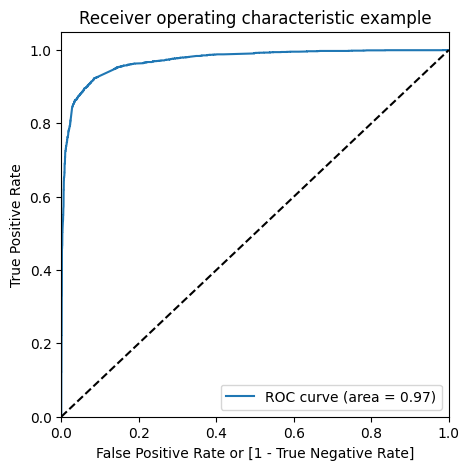

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 9: Finding optimal Cutoff point

In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000804,6490,0,0.080374,1,0,0,0,0,0,0,0,0,0
1,1,0.281937,4026,0,28.193707,1,1,1,0,0,0,0,0,0,0
2,1,0.545735,6453,1,54.573463,1,1,1,1,1,1,0,0,0,0
3,1,0.864317,8949,1,86.431657,1,1,1,1,1,1,1,1,1,0
4,0,0.016707,6467,0,1.670666,1,0,0,0,0,0,0,0,0,0


In [145]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386956  1.000000  0.000000
0.1   0.1  0.827274  0.971774  0.736065
0.2   0.2  0.893119  0.952823  0.855434
0.3   0.3  0.917928  0.918952  0.917282
0.4   0.4  0.921517  0.896774  0.937134
0.5   0.5  0.923545  0.876210  0.953423
0.6   0.6  0.923545  0.854839  0.966913
0.7   0.7  0.909970  0.804435  0.976584
0.8   0.8  0.899672  0.768952  0.982184
0.9   0.9  0.881573  0.710081  0.989819


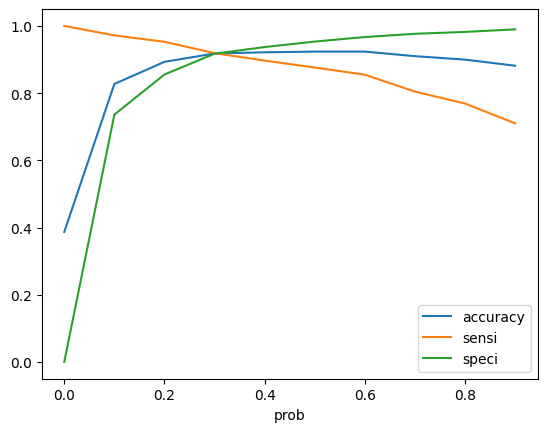

In [146]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [147]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.000804
4026    0.281937
6453    0.545735
8949    0.864317
6467    0.016707
3481    0.020746
2209    0.018967
1608    0.009385
2969    0.048969
8560    0.040141
dtype: float64

In [148]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([8.03739369e-04, 2.81937072e-01, 5.45734632e-01, 8.64316568e-01,
       1.67066622e-02, 2.07455715e-02, 1.89666088e-02, 9.38474786e-03,
       4.89693398e-02, 4.01407177e-02])

In [149]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.000804,6490
1,1,0.281937,4026
2,1,0.545735,6453
3,1,0.864317,8949
4,0,0.016707,6467


In [178]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))


# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted,Lead Score
0,0,0.000804,6490,0,0.08
1,1,0.281937,4026,0,28.19
2,1,0.545735,6453,1,54.57
3,1,0.864317,8949,1,86.43
4,0,0.016707,6467,0,1.67


In [151]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3604  325]
 [ 201 2279]]


In [152]:
# Let's check the overall accuracy.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy =',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
Precision = TP/(TP + FP)
print('Precision =',Precision)
Recall = TP/(TP + FN)
print('Recall = ',Recall)
Sensitivity = TP/(TP + FN)
print('Sensitivity =',Sensitivity)
Prevalance = (TP + FN)/(TP + TN + FP + FN)
print('Prevalance =',Prevalance)
Specificity = TN/(TN + FP)
print('Specificity =',Specificity)
Positive_Predictive_Value = TP / float(TP+FP)
print('Positive Predictive Value =', Positive_Predictive_Value)
Negative_Predictive_Value = TN / float(TN+ FN)
print('Negative Predictive Value =', Negative_Predictive_Value)
True_Positive_Rate = TP/(TP + FN)
print('True Positive Rate =',True_Positive_Rate)
False_Positive_Rate = FP/(FP + TN)
print('False Positive Rate =',False_Positive_Rate)

Accuracy = 0.9179279138711187
Precision = 0.8751920122887865
Recall =  0.9189516129032258
Sensitivity = 0.9189516129032258
Prevalance = 0.3869558433452957
Specificity = 0.9172817510817002
Positive Predictive Value = 0.8751920122887865
Negative Predictive Value = 0.9471747700394219
True Positive Rate = 0.9189516129032258
False Positive Rate = 0.08271824891829982


## Precision and recall tradeoff

In [153]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6404    0
 6405    1
 6406    1
 6407    1
 6408    1
 Name: Converted, Length: 6409, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6404    0
 6405    1
 6406    1
 6407    1
 6408    1
 Name: Predicted, Length: 6409, dtype: int64)

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

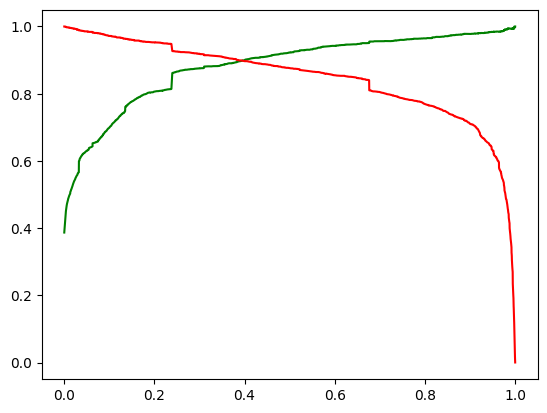

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 10: Making predictions on the test set

In [156]:
X_test[num_var] = scaler.transform(X_test[num_var])

In [157]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Intrested,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Potential Lead,Last Notable Activity_Modified
7359,1,-0.207937,0,0,0,0,1,0,0,0,1,0,0,0,0
2201,0,-0.653460,0,0,0,1,0,0,1,0,0,0,0,0,1
2473,1,1.486150,0,0,0,0,1,0,0,0,0,0,1,0,0
8388,0,-0.657127,0,0,0,0,0,0,1,0,0,0,0,0,1
2949,0,-0.492119,0,0,0,0,0,0,0,0,1,0,0,0,1


In [158]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [159]:
y_test_pred = res.predict(X_test_sm)

In [160]:
y_test_pred[:10]

7359    0.024621
2201    0.000900
2473    0.995017
8388    0.001789
2949    0.001148
8144    0.842364
8443    0.976234
290     0.032541
8626    0.041236
5709    0.593033
dtype: float64

In [161]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7359,0.024621
2201,0.000900
2473,0.995017
8388,0.001789
2949,0.001148


In [162]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
7359,0
2201,0
2473,1
8388,0
2949,0
...,...
7308,0
3154,0
9118,0
8092,1


In [163]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [164]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [165]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [166]:
y_pred_final.head()

,Converted,CustID,0
0,0,7359,0.024621
1,0,2201,0.000900
2,1,2473,0.995017
3,0,8388,0.001789
4,0,2949,0.001148


In [167]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [168]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [169]:
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,7359,0,0.024621
1,2201,0,0.000900
2,2473,1,0.995017
3,8388,0,0.001789
4,2949,0,0.001148


In [175]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))

In [176]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted,Lead Score
0,7359,0,0.024621,0,2.46
1,2201,0,0.000900,0,0.09
2,2473,1,0.995017,1,99.50
3,8388,0,0.001789,0,0.18
4,2949,0,0.001148,0,0.11


In [172]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion)

[[1595  108]
 [  91  954]]


In [173]:
# Let's check the overall accuracy.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy =',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
Precision = TP/(TP + FP)
print('Precision =',Precision)
Recall = TP/(TP + FN)
print('Recall = ',Recall)
Sensitivity = TP/(TP + FN)
print('Sensitivity =',Sensitivity)
Prevalance = (TP + FN)/(TP + TN + FP + FN)
print('Prevalance =',Prevalance)
Specificity = TN/(TN + FP)
print('Specificity =',Specificity)
Positive_Predictive_Value = TP / float(TP+FP)
print('Positive Predictive Value =', Positive_Predictive_Value)
Negative_Predictive_Value = TN / float(TN+ FN)
print('Negative Predictive Value =', Negative_Predictive_Value)
True_Positive_Rate = TP/(TP + FN)
print('True Positive Rate =',True_Positive_Rate)
False_Positive_Rate = FP/(FP + TN)
print('False Positive Rate =',False_Positive_Rate)

Accuracy = 0.9275836972343523
Precision = 0.8983050847457628
Recall =  0.9129186602870814
Sensitivity = 0.9129186602870814
Prevalance = 0.3802765647743814
Specificity = 0.9365825014679976
Positive Predictive Value = 0.8983050847457628
Negative Predictive Value = 0.9460260972716489
True Positive Rate = 0.9129186602870814
False Positive Rate = 0.06341749853200235


### Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
- Accuracy : 91.79%
- Sensitivity : 91.9%
- Specificity : 91.73%

Test Data: 
- Accuracy : 92.76%
- Sensitivity : 91.29%
- Specificity : 93.66%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model